In [83]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
#one hot encoding
from keras.utils.np_utils import to_categorical
import random

In [84]:
np.random.seed(0)

In [85]:
# trainig array as welll as labels array in  tuple
(X_train,y_train), (X_test,y_test) = mnist.load_data() # this automatically splits the data in train and test


In [86]:
print(X_train.shape) #28x28 pixels 
print(y_train.shape)
# why 60000 images?, large datasets are fed to avoid overfitting as it is hard to memorize so many images
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [87]:
#takes a single arg which is either true or false, if yes then the code will run else warning (string)
#check 1. check the no of images == no of labels
assert(X_train.shape[0] == y_train.shape[0]),"The no of train images is not equal to no of labels"
assert(X_train.shape[0] == y_train.shape[0]),"The no of test images is not equal to no of labels"
#check2 for pixels size matching from index 1 to last index 28x28
assert(X_train.shape[1:] == (28,28)),"The dimensions of training images is not equal to 28x28"
assert(X_test.shape[1:] == (28,28)),"The dimensions of test images is not equal to 28x28"

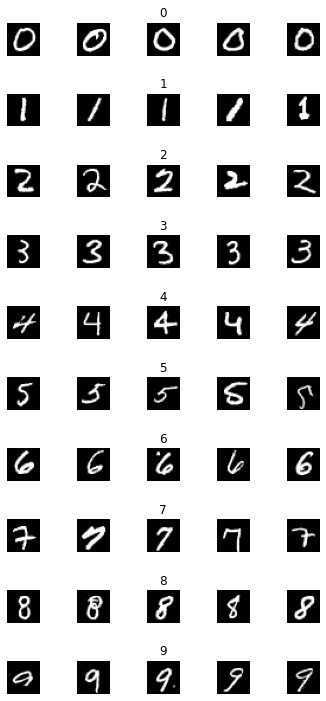

In [88]:
### VISUALIZATION 10 rows 5 cols grid

no_of_samples = []

cols = 5
no_of_classes = 10

#returns a tuple of 2 values an instance of image and plot axes
fig, axis = plt.subplots(nrows = no_of_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()# monimizes overlapping of the plots

#loop through every column in a row down fashion to get the images using 2 forloops
for i in range(cols):#col
    for j in range(no_of_classes):#row
        # filter out the images which do not belong to the class and then extract the images one by one
        x_selected = X_train[y_train == j]# keep array images with label of the same class(column no.)
        
        #we have to display the random images iterated  by displaying the 28x28 pixels- 
        #random(range from 0 index, last index of image),xpixel,ypixel
           # show this in the first cell of the grid axis[0][0]
        axis[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray")) 
        # 1x1,2x1,3x1 row wise showing of images in the grid (x_selected is of the shape of X_train))
        # we need a grayscale colourmap so cmap = plt.get_cmap("gray")
        axis[j][i].axis("off")
        #for coloumn 3 and every row we want to turn axis value off and give a title
        if i==2:
            axis[j][i].set_title(str(j))#str(j) is the class no 
        #now we have to save no of training images belong to each classin an array (no_of_samples{})
            no_of_samples.append(len(x_selected))
            
            

        

In [89]:
print(no_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'No. of Samples')

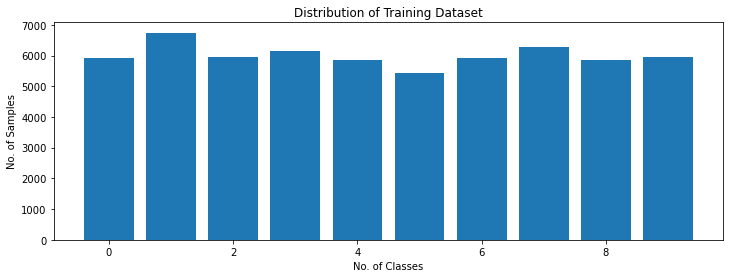

In [90]:
# plot these no of samples on a par graph to visualize them


plt.figure(figsize=(12,4))
plt.bar(range(0,no_of_classes), no_of_samples) #(X = from 0 to the no of classes ,Y= no of samples)
plt.title("Distribution of Training Dataset")
plt.xlabel("No. of Classes")
plt.ylabel("No. of Samples")

In [91]:
y_train = to_categorical(y_train,no_of_classes)
y_test = to_categorical(y_test,no_of_classes)

### NORMALIZING- dividing by 255 we can get the max pixel value to be between 0 and 1 of every image
# important step as it decreases Variance between the dataset therefore model learn quickly 
# also sigmoid and softmax uses e^x so e^255 would be very high leading to large range in pixel values
# ths lead to the model to find it difficult to adjust the weight and bias and hyperparameter values
X_train = X_train/255
X_test = X_test/25

#now we have to flatten the images
# to multiply by the weights and bias matrix we have to reduce the images to 1xD (but they are 28x28)
# we haveto flatten them into one row of 28x28= 784 columns(1x784)

In [92]:
###FLATTENING IMAGES

In [93]:
no_of_pixels = 784
X_train = X_train.reshape(X_train.shape[0],no_of_pixels) #(all images, pixel,pixel)
X_test = X_test.reshape(X_test.shape[0],no_of_pixels) #(all images, pixel,pixel)
print(X_train.shape) #28x28 = 784x1 pixels 
print(X_test.shape) #28x28 = 784x1 pixels 


(60000, 784)
(10000, 784)


In [94]:
### MODEL CREATION

# As data became complicated we required hidden layers for computation 
# we will use a DNN 10 classes 10 output nodes (softmax) 
# How many? well have to experiment

def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = no_of_pixels,activation='relu')) # input layer
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu')) # hidden layer
    model.add(Dense(no_of_classes, activation='softmax'))#output softmax require in last layer
    model.compile(Adam(0.01), loss='categorical_crossentropy',metrics=['accuracy'])
    return model


In [95]:
model = create_model()
print(model.summary())

#28x28 =784 pixels and all images are gray scale so one intensity scaling from 0 - 255 , 
#what about rgb image = 72x72 15552 the computation would increase and we wont have enough computation power to train the model to fit the dataset 
### Therefore we use Convolutional Neural Network

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 30)                330       
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [96]:
h = model.fit(X_train, y_train, validation_split=0.1,epochs=15, batch_size = 200, verbose=1, shuffle=1) #60000 images

Epoch 1/15
270/270 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.8331 - val_loss: 0.2350 - val_accuracy: 0.9313
Epoch 2/15
270/270 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.9165 - val_loss: 0.2242 - val_accuracy: 0.9322
Epoch 3/15
270/270 [==============================] - 1s 2ms/step - loss: 0.2589 - accuracy: 0.9227 - val_loss: 0.1942 - val_accuracy: 0.9438
Epoch 4/15
270/270 [==============================] - 1s 2ms/step - loss: 0.2442 - accuracy: 0.9268 - val_loss: 0.2053 - val_accuracy: 0.9422
Epoch 5/15
270/270 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9294 - val_loss: 0.1979 - val_accuracy: 0.9418
Epoch 6/15
270/270 [==============================] - 1s 2ms/step - loss: 0.2274 - accuracy: 0.9317 - val_loss: 0.1949 - val_accuracy: 0.9433
Epoch 7/15
270/270 [==============================] - 1s 2ms/step - loss: 0.2219 - accuracy: 0.9332 - val_loss: 0.1991 - val_accuracy: 0.9417
Epoch 

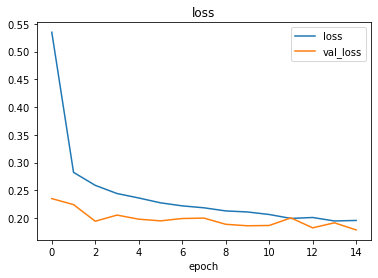

In [97]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

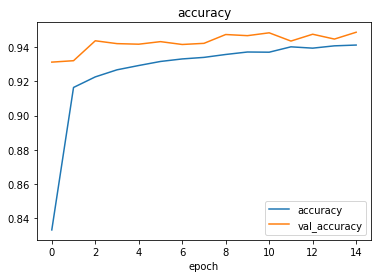

In [98]:
# training loss is calculated with the raining dataset and validation loss in the validation set = 0.1*training set
# more epochs it runs validation error reaches the trainiiig error - overfitting fails to generalize(ratta)


plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'])


In [99]:
# 15 epochs are enough as model fits the validation accuracy starts decreasing where training accuracy increases
# model should create general patterns generalize and predict the data it has not seen(test data) 
# to many nodes and layers will quickly cause overfitting and validation error will shoot up quickly.


In [100]:
### FINAL EVALUATION(TEST)
score = model.evaluate(X_test, y_test, verbose=0)# verbose =0 for not displaying the prgresss bar
print(type(score)) # list is provided
print('Test score :', score[0])#score
print('Test accuracy :', score[1]) #accuracy in percentage

<class 'list'>
Test score : 1.709436297416687
Test accuracy : 0.9259999990463257


In [101]:
# with CNN we can easily reach98-99 percent accuracy 

1/1 [==============================] - 0s 47ms/step
predicted digit: [2]


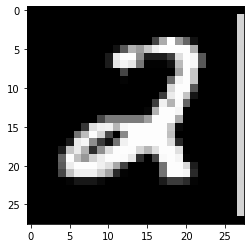

In [107]:
# Test -1 .Downloading and importing the image
# 2. Converting to the format in which it will be entered into the model

import cv2

import requests
from PIL import Image
     
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
#reading the raw image
img = Image.open(response.raw)

# plotting the image in gray scale form
plt.imshow(img, cmap=plt.get_cmap('gray'))

#converting the image to the format of data we fed our model(28x28)
img = np.asarray(img)
img = cv2.resize(img, (28, 28))

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#converting the image in the form where the digit is full of white pixels and bacground is black as the mnist follows the same convention
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

#normalizing and then converting to the format in which we will multiply our parameters(weights and biases)
img = img/255
img = img.reshape(1, 784)
     
#prediction = model.predict_classes(img)
#Using the predict classes function to get the prediction of which class the number belongs to
prediction = np.argmax(model.predict(img), axis=-1)

print("predicted digit:", str(prediction))

In [105]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 12.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# As we see that the test data to be correctly classified we needed a lot of computation capacity and DNN.
# to solve this problem in a much efficient way we needto use the Convolutional Neural Networks for image Classification